Loading data for step 1000...
Generating plot...


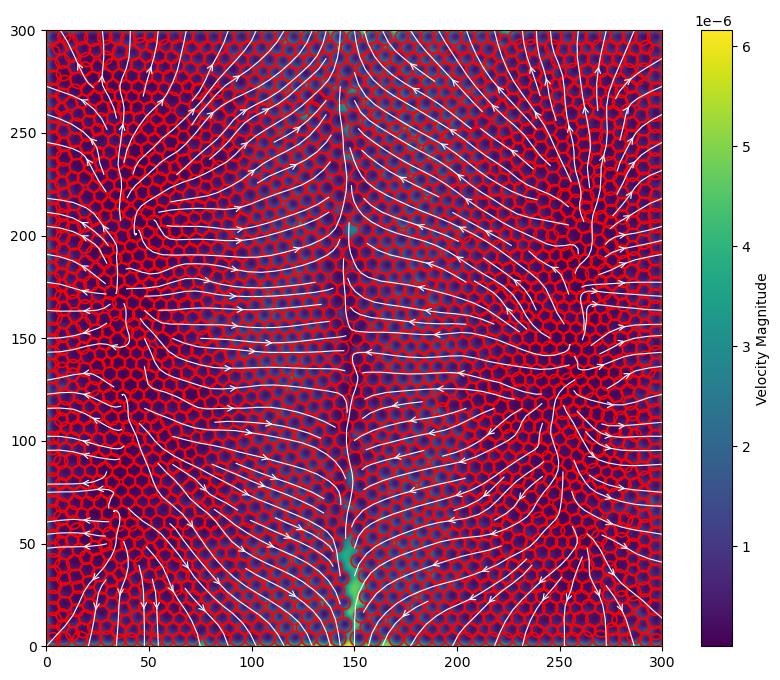

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

def visualize_velocity_field(step_number):
    """
    Loads and visualizes the fluid velocity field for a specific time step
    using a smooth, high-resolution background.
    """
    # 1. Define the file path
    output_dir = "simulation_data_WoundHealing_Hydro_OFF"
    filename = os.path.join(output_dir, f"WoundHealing_Hydro_OFF_data_{step_number:04d}.npz")

    if not os.path.exists(filename):
        print(f"Error: File not found at {filename}")
        return

    # 2. Load data from the .npz file
    print(f"Loading data for step {step_number}...")
    with np.load(filename, allow_pickle=True) as data:
        fluid_velocity = data['final_fluid_velocity']
        cell_positions = data['cell_positions']
        cell_radii = data['cell_radii']
        config = data['config'].item()
        physical_size = config['physical_size']

    # 3. Calculate velocity magnitude
    vx_full = fluid_velocity[:, :, 0]
    vy_full = fluid_velocity[:, :, 1]
    velocity_magnitude = np.sqrt(vx_full**2 + vy_full**2)

    # 4. Plotting
    print("Generating plot...")
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_facecolor('black')
    ax.set_title(f"Fluid Velocity Field at Step {step_number}", color='white')

    im = ax.imshow(velocity_magnitude,
                   origin='lower',
                   extent=[0, physical_size, 0, physical_size],
                   interpolation='bicubic',
                   cmap='viridis')

    # Create a grid for the streamlines
    y_coords = np.linspace(0, physical_size, 40)
    x_coords = np.linspace(0, physical_size, 40)
    x, y = np.meshgrid(x_coords, y_coords)

    grid_res = fluid_velocity.shape[0]
    xi = (x / physical_size * grid_res).astype(int)
    yi = (y / physical_size * grid_res).astype(int)

    # --- FIX: Clip indices to the valid range [0, grid_res - 1] ---
    xi = np.clip(xi, 0, grid_res - 1)
    yi = np.clip(yi, 0, grid_res - 1)
    # ----------------------------------------------------------------

    vx_stream = fluid_velocity[yi, xi, 0]
    vy_stream = fluid_velocity[yi, xi, 1]

    ax.streamplot(x, y, vx_stream, vy_stream,
                  color='white',
                  linewidth=0.8,
                  density=1.5,
                  arrowstyle='->',
                  arrowsize=1.0)
    
    for i in range(len(cell_positions)):
        circle = plt.Circle(cell_positions[i], cell_radii[i], color='red', fill=False, lw=1.2)
        ax.add_artist(circle)

    # 5. Final Touches
    ax.set_xlim(0, physical_size)
    ax.set_ylim(0, physical_size)
    ax.set_aspect('equal', 'box')
    fig.colorbar(im, ax=ax, label='Velocity Magnitude')

    plt.show()

# --- Main ---
step_to_visualize = 1000
visualize_velocity_field(step_to_visualize)